# scikit-FIBERS: Demonstration Notebook
This notebook is set up as a demonstration for running scikit-FIBERS.

***
## Imports:

In [1]:
import os
import pickle
from sklearn.metrics import classification_report
from src.skfibers.fibers import FIBERS
#from src.skfibers.experiments.survival_sim_simple import survival_data_simulation
from src.skfibers.experiments.survival_covariates_sim import survival_data_simulation_covariates
from src.skfibers.experiments.survival_categorical_covariates_sim import survival_data_simulation_categorical_covariates
current_working_directory = os.getcwd()
print(current_working_directory)

/Users/bling/Documents/FIBERS-PURM-2024/FIBERS_working_area_pareto


***
## Set Up Local Run Parameters


In [2]:
local_save = False
folder_path = './FIBERS_output'
if not os.path.exists(folder_path):
        os.makedirs(folder_path)
if local_save:
    output_folder = 'local_output'
else:
    output_folder = folder_path

***
## Generate Simulated Survial Data

In [3]:
data_name = 'example_dataset_covariates'
df, data = survival_data_simulation_categorical_covariates(instances=10000, total_features=100,predictive_features=10,feature_frequency_range=(0.3, 0.5), random_seed=35, threshold=3)
df.to_csv(output_folder+'/'+data_name+'.csv', index=False)
#data = pd.read_csv(output_folder+'/'+data_name+'.csv')
#true_risk_group = data[['TrueRiskGroup']]
#data = data.drop('TrueRiskGroup', axis=1)

#value_counts = true_risk_group['TrueRiskGroup'].value_counts()
#print(value_counts)

covariates = ['AFRICAN-AMERICAN', 'ASIAN', 'HISPANIC', 'OTHER', 'WHITE', 'FDFR', 'FDMR', 'MDMR', 'MDFR'] 

6197


In [ ]:
import numpy as np
import pandas as pd

threshold = 3
expected_asian = []
expected_white = []
expected_african_american = []
expected_hispanic = []
expected_other = []

expected_mdmr = []
expected_fdfr = []
expected_mdfr = []
expected_fdmr = []

for x in range(50):
    data_name = 'example_dataset_covariates'
    df, data = survival_data_simulation_categorical_covariates(instances=10000, total_features=100,predictive_features=10,feature_frequency_range=(0.3, 0.5), random_seed=x, threshold=3)
    df.to_csv(output_folder+'/'+data_name+'.csv', index=False)
    predictive_feature_list = []
    for x in range(10):
        name = 'P_' + str(x + 1)
        predictive_feature_list.append(name)

    outcome_label = "Duration"
    feature_df = df.loc[:,predictive_feature_list]
    predictive_feature_sums = feature_df[predictive_feature_list].sum(axis=1)
    real_sum_df = pd.DataFrame({'real_feature_sum': predictive_feature_sums})
    new_df = pd.concat([df, real_sum_df],axis=1)

    low_df = new_df[new_df['real_feature_sum'] <= threshold]

    real_low_african_american = low_df[low_df['AFRICAN-AMERICAN'] == 1]
    real_low_aa_ct = len(real_low_african_american[outcome_label].to_list())
    expected_african_american.append(real_low_aa_ct)

    real_low_white = low_df[low_df['WHITE'] == 1]
    real_low_white_ct = len(real_low_white[outcome_label].to_list())
    expected_white.append(real_low_white_ct)

    real_low_asian = low_df[low_df['ASIAN'] == 1]
    real_low_asian_ct = len(real_low_asian[outcome_label].to_list())
    expected_asian.append(real_low_asian_ct)

    real_low_hispanic = low_df[low_df['HISPANIC'] == 1]
    real_low_hispanic_ct = len(real_low_hispanic[outcome_label].to_list())
    expected_hispanic.append(real_low_hispanic_ct)

    real_low_other = low_df[low_df['OTHER'] == 1]
    real_low_other_ct = len(real_low_other[outcome_label].to_list())
    expected_other.append(real_low_other_ct)

    real_low_mdmr = low_df[low_df['MDMR'] == 1]
    real_low_mdmr_ct = len(real_low_mdmr[outcome_label].to_list())
    expected_mdmr.append(real_low_mdmr_ct)

    real_low_fdfr = low_df[low_df['FDFR'] == 1]
    real_low_fdfr_ct = len(real_low_fdfr[outcome_label].to_list())
    expected_fdfr.append(real_low_fdfr_ct)

    real_low_fdmr = low_df[low_df['FDMR'] == 1]
    real_low_fdmr_ct = len(real_low_fdmr[outcome_label].to_list())
    expected_fdmr.append(real_low_fdmr_ct)

    real_low_fdmr = low_df[low_df['MDFR'] == 1]
    real_low_fdmr_ct = len(real_low_fdmr[outcome_label].to_list())
    expected_mdfr.append(real_low_fdmr_ct)

In [ ]:
data_name = 'example_dataset_covariates'
df, data = survival_data_simulation_covariates(instances=10000, total_features=100,predictive_features=5,feature_frequency_range=(0.3, 0.3), random_seed=42)
df.to_csv(output_folder+'/'+data_name+'.csv', index=False)
#data = pd.read_csv(output_folder+'/'+data_name+'.csv')
#true_risk_group = data[['TrueRiskGroup']]
#data = data.drop('TrueRiskGroup', axis=1)

#value_counts = true_risk_group['TrueRiskGroup'].value_counts()
#print(value_counts)

covariates = ['C_1', 'C_2'] 

In [ ]:
df

***
## Run FIBERS (Training)

In [4]:
fibers = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=0, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="residuals", log_rank_weighting=None, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=covariates, pop_clean = 'group_strata',  
                report=[0,10,20,30,40,50], random_seed=27, verbose=False)
fibers = fibers.fit(data)

Dropped 0 invariant feature columns.
Iteration 1: norm_delta = 2.62e-01, step_size = 0.9500, log_lik = -76075.62247, newton_decrement = 3.86e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 3.04e-02, step_size = 0.9500, log_lik = -75685.34085, newton_decrement = 6.29e+00, seconds_since_start = 0.3
Iteration 3: norm_delta = 1.96e-03, step_size = 0.9500, log_lik = -75679.03000, newton_decrement = 2.41e-02, seconds_since_start = 0.5
Iteration 4: norm_delta = 3.29e-06, step_size = 1.0000, log_lik = -75679.00590, newton_decrement = 5.41e-08, seconds_since_start = 0.6
Convergence success after 4 iterations.
                                                  feature_list  \
0         [P_3, P_7, R_12, R_45, R_55, R_63, R_65, R_79, R_83]   
1                                                        [P_8]   
2                     [P_1, P_2, R_12, R_34, R_47, R_83, R_84]   
3                                      [P_4, R_21, R_52, R_57]   
4                                      [R_2, R_28, R_

 20%|██        | 10/50 [00:07<00:18,  2.18it/s]

ITERATION: 10
                                                                                                               feature_list  \
0                                                                        [P_10, P_3, P_4, P_7, P_8, R_12, R_28, R_76, R_82]   
1                                           [P_10, P_3, P_4, P_7, P_8, R_12, R_21, R_25, R_26, R_28, R_4, R_44, R_67, R_71]   
2                     [P_10, P_3, P_4, P_6, P_7, P_8, P_9, R_12, R_25, R_26, R_28, R_4, R_52, R_59, R_62, R_63, R_71, R_82]   
3                          [P_10, P_3, P_4, P_6, P_7, P_8, P_9, R_12, R_25, R_26, R_28, R_52, R_59, R_62, R_63, R_71, R_82]   
4                                      [P_10, P_3, P_4, P_6, P_7, P_8, P_9, R_12, R_21, R_25, R_26, R_52, R_54, R_62, R_71]   
5                                                      [P_10, P_3, P_4, P_8, P_9, R_12, R_28, R_52, R_59, R_63, R_71, R_82]   
6                                                      [P_10, P_3, P_6, P_8, P_9, R_12, R_51, R_5

 22%|██▏       | 11/50 [00:08<00:29,  1.32it/s]


ValueError: Values must be numeric: no strings, datetimes, objects, etc.

### Collect Race and Gender Distribution Data

In [ ]:
log_rank_asian = []
log_rank_african_american = []
log_rank_mdfr = []
log_rank_fdmr = []

resid_asian = []
resid_african_american = []
resid_mdfr = []
resid_fdmr = []

for seed in range(50):
  fibers = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=0, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="log_rank", log_rank_weighting=None, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=covariates, pop_clean = 'group_strata',  
                report=[], random_seed=seed, verbose=False)
  fibers = fibers.fit(data)

  real_low_aa_ct, bin_low_aa_ct, real_high_aa_ct, bin_high_aa_ct, \
  real_low_white_ct, bin_low_white_ct, real_high_white_ct, bin_high_white_ct, \
  real_low_hispanic_ct, bin_low_hispanic_ct, real_high_hispanic_ct, bin_high_hispanic_ct, \
  real_low_asian_ct, bin_low_asian_ct, real_high_asian_ct, bin_high_asian_ct, \
  real_low_other_ct, bin_low_other_ct, real_high_other_ct, bin_high_other_ct, \
  real_low_mdmr_ct, bin_low_mdmr_ct, real_high_mdmr_ct, bin_high_mdmr_ct, \
  real_low_fdfr_ct, bin_low_fdfr_ct, real_high_fdfr_ct, bin_high_fdfr_ct, \
  real_low_fdmr_ct, bin_low_fdmr_ct, real_high_fdmr_ct, bin_high_fdmr_ct, \
  real_low_mdfr_ct, bin_low_mdfr_ct, real_high_mdfr_ct, bin_high_mdfr_ct = fibers.get_group_composition(df, 0, predictive_features=10, threshold=3)

  log_rank_asian.append(bin_low_asian_ct)
  log_rank_african_american.append(bin_low_aa_ct)
  log_rank_mdfr.append(bin_low_mdfr_ct)
  log_rank_fdmr.append(bin_low_fdmr_ct)

  fibers_resid = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=0, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="residuals", log_rank_weighting=None, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=covariates, pop_clean = 'group_strata',  
                report=[], random_seed=seed, verbose=False)
  fibers_resid = fibers_resid.fit(data)

  real_low_aa_ct, bin_low_aa_ct, real_high_aa_ct, bin_high_aa_ct, \
  real_low_white_ct, bin_low_white_ct, real_high_white_ct, bin_high_white_ct, \
  real_low_hispanic_ct, bin_low_hispanic_ct, real_high_hispanic_ct, bin_high_hispanic_ct, \
  real_low_asian_ct, bin_low_asian_ct, real_high_asian_ct, bin_high_asian_ct, \
  real_low_other_ct, bin_low_other_ct, real_high_other_ct, bin_high_other_ct, \
  real_low_mdmr_ct, bin_low_mdmr_ct, real_high_mdmr_ct, bin_high_mdmr_ct, \
  real_low_fdfr_ct, bin_low_fdfr_ct, real_high_fdfr_ct, bin_high_fdfr_ct, \
  real_low_fdmr_ct, bin_low_fdmr_ct, real_high_fdmr_ct, bin_high_fdmr_ct, \
  real_low_mdfr_ct, bin_low_mdfr_ct, real_high_mdfr_ct, bin_high_mdfr_ct = fibers_resid.get_group_composition(df, 0, predictive_features=10, threshold=3)

  resid_asian.append(bin_low_asian_ct)
  resid_african_american.append(bin_low_aa_ct)
  resid_mdfr.append(bin_low_mdfr_ct)
  resid_fdmr.append(bin_low_fdmr_ct)




In [ ]:
import matplotlib.pyplot as plt
seed_values = range(50)
plt.plot(seed_values, expected_african_american, label="expected")
plt.plot(seed_values, resid_african_american, label="resid fibers")

plt.xlabel("random seed survival data")
plt.ylabel("african american low risk count")
plt.title('Expected vs Log Rank Prediction')
plt.legend(loc='best')
plt.show()

### Report Run Time

In [ ]:
# Report run time
print(fibers.elapsed_time)

***
## Top (or Target) Bin Examination
### Specify Bin to Examine

In [5]:
bin_index = 0 # lowest index is the bin with the highest fitness (only reports the bin ranked at the top, despite possible fitness ties for top)

### Get Bin Details

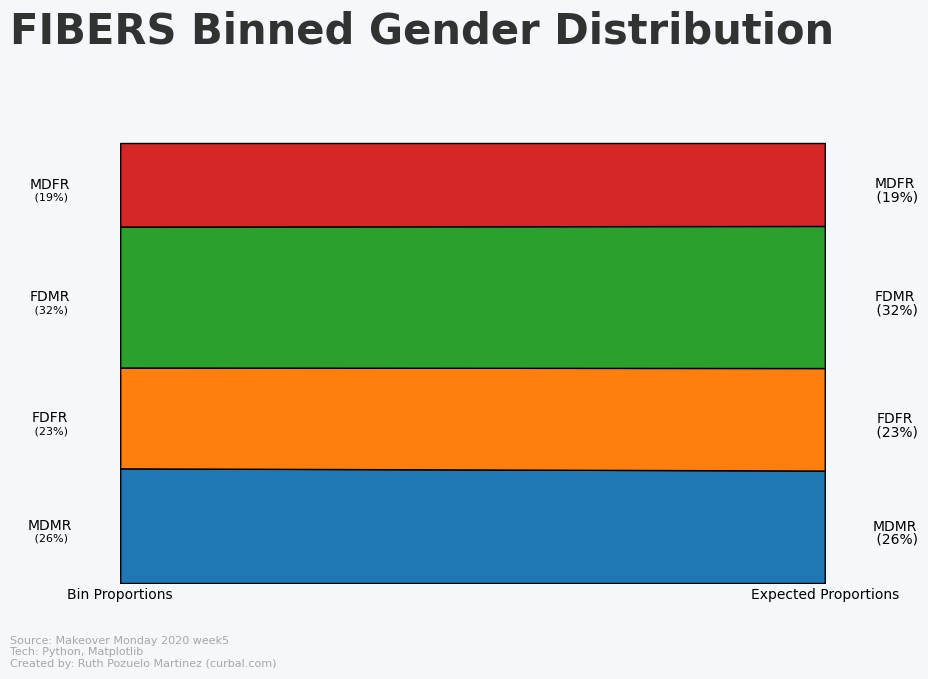

In [8]:
import matplotlib.pyplot as plt
import numpy as np
#fibers.get_bin_report(0)
fibers.get_gender_proportion(df, bin_index, predictive_features=10, threshold=3)

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

def format_p_value(p_value):
    if p_value >= 0.0001:
        return f"{p_value:.4f}"
    else:
        return f"{p_value:.4e}"

# Perform t-tests and create the DataFrame
df = pd.DataFrame({
    'African American': [
        format_p_value(ttest_ind(resid_african_american, expected_african_american, alternative='two-sided').pvalue),
        format_p_value(ttest_ind(log_rank_african_american, expected_african_american, alternative='two-sided').pvalue)
    ],
    'Asian': [
        format_p_value(ttest_ind(resid_asian, expected_asian, alternative='two-sided').pvalue),
        format_p_value(ttest_ind(log_rank_asian, expected_asian, alternative='two-sided').pvalue)
    ],
    'MDFR': [
        format_p_value(ttest_ind(resid_mdfr, expected_mdfr, alternative='two-sided').pvalue),
        format_p_value(ttest_ind(log_rank_mdfr, expected_mdfr, alternative='two-sided').pvalue)
    ],
    'FDMR': [
        format_p_value(ttest_ind(resid_fdmr, expected_fdmr, alternative='two-sided').pvalue),
        format_p_value(ttest_ind(log_rank_fdmr, expected_fdmr, alternative='two-sided').pvalue)
    ]
}, index=['Resid', 'Log Rank'])

# Display the DataFrame
print(df)

In [ ]:
fibers = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=0, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="log_rank_residuals", log_rank_weighting=None, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=covariates, pop_clean = 'group_strata',  
                report=[0,10,20,30,40], random_seed=47, verbose=False)
fibers = fibers.fit(data)

real low risk african americans: 479
bin's low risk african americans: 502
real high risk african americans: 751
bin's high risk african americans: 728
real low risk white: 2272
bin's low risk white: 2435
real high risk white: 3706
bin's high risk white: 3543
real low risk hispanic: 715
bin's low risk hispanic: 768
real high risk hispanic: 1159
bin's high risk hispanic: 1106
real low risk asian: 217
bin's low risk asian: 239
real high risk asian: 372
bin's high risk asian: 350
real low risk other: 120
bin's low risk other: 135
real high risk other: 209
bin's high risk other: 194
real low risk mdmr: 972
bin's low risk mdmr: 1063
real high risk mdmr: 1708
bin's high risk mdmr: 1617
real low risk fdfr: 886
bin's low risk fdfr: 967
real high risk fdfr: 1380
bin's high risk fdfr: 1299
real low risk fdmr: 1228
bin's low risk fdmr: 1298
real high risk fdmr: 1973
bin's high risk fdmr: 1903
real low risk mdfr: 717
bin's low risk mdfr: 751
real high risk mdfr: 1136
bin's high risk mdfr: 1102


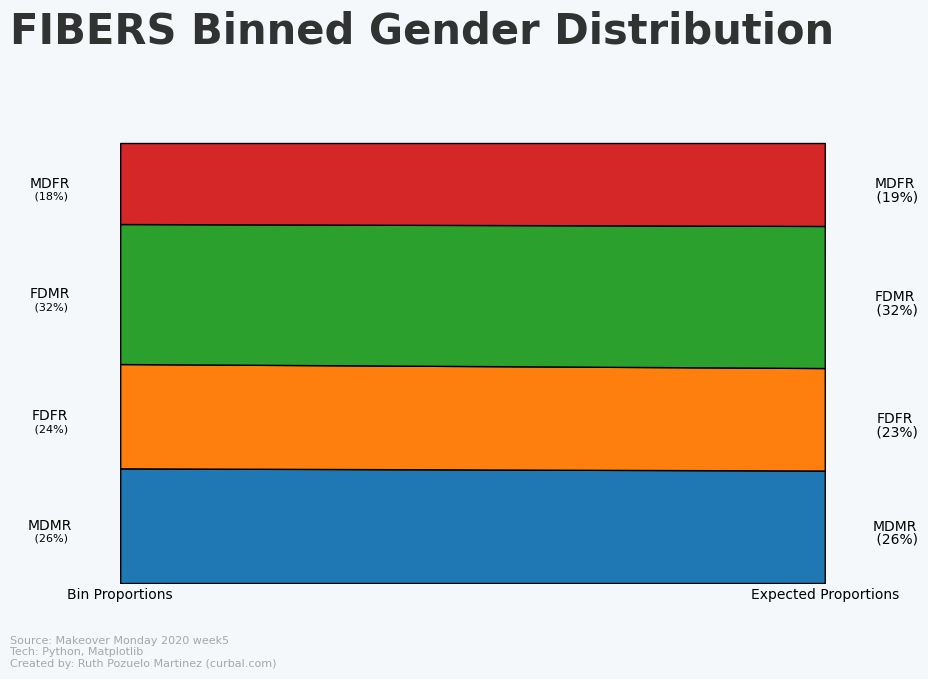

In [10]:
bin_index = 0
fibers.get_gender_proportion(data, bin_index, predictive_features=10, threshold=3)

### Plot: Kaplan Meier Survival Curves For Each Group Defined by the Target Bin

In [ ]:
fibers.get_kaplan_meir(data,bin_index,save=True,output_folder=output_folder,data_name=data_name)

### Evaluate Target Bin Using Cox Proportional Hazard Model (adjusting for covariates)

In [ ]:
bin_index = 0
summary = fibers.get_cox_prop_hazard(data, bin_index)
bin_hr = summary['exp(coef)'].iloc[0]
bin_low_CI = summary['exp(coef) lower 95%'].iloc[0]
bin_upper_CI = summary['exp(coef) upper 95%'].iloc[0]
bin_p_val = summary['p'].iloc[0]
print("Bin HR: "+str(bin_hr)+" ("+str(bin_low_CI)+"-"+str(bin_upper_CI)+")")
print("Bin HR p-value: "+str(bin_p_val))
summary.to_csv(output_folder+'/'+'Cox_PH_'+str(bin_index)+'_'+data_name+'.csv', index=False)
summary

### Check and View Any Top Bin Ties

In [ ]:
fibers.report_ties()


***
## Bin Population Examination
### Plot: Basic Bin Population Heatmap

In [ ]:
fibers.get_bin_population_heatmap_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Custom Bin Population Heatmap

In [ ]:
group_names=["P","R"]
legend_group_info = ['Not in Bin','Non-Predictive Feature in Bin','Predictive Feature in Bin','Covariate Associated Feature in Bin'] #2 default colors first followed by additional color descriptions in legend
color_features = [['P_1','P_2','P_3','P_4','P_5','P_6','P_7','P_8','P_9','P_10'],['PC_1']]
colors = [(1, 0, 0),(0, 0.8, 0.5)] # red ---Alternatively orange (1, 0.5, 0)
default_colors = [(.95, .95, 1),(0, 0, 1)] #very light blue and blue
max_bins = 100
max_features = 100

fibers.get_custom_bin_population_heatmap_plot(group_names,legend_group_info,color_features,colors,default_colors,max_bins,max_features,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Population Pareto Front
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
fibers.get_pareto_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Estimated Feature Tracking Scores
These scores accumulate throughout the training process, and do not nesessarily reflect feature importance of individual bins or the final bin population.

In [ ]:
fibers.get_feature_tracking_plot(max_features=50,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Dataset Covariate Residuals (if applicable)

In [ ]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_residuals_histogram(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Log-Rank Scores Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if fibers.fitness_metric == 'log_rank_residuals':
    fibers.get_log_rank_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

###  Evaluate All Bins in Population using Cox PH Model (Can be slow)

In [ ]:
fibers.calculate_cox_prop_hazards(data)

### Plot: Bin Log-Rank Scores Vs. Adjusted Hazard Ratios (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if fibers.fitness_metric == 'log_rank' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_log_rank_adj_HR_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':   
    fibers.get_adj_HR_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Log Rank * Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if fibers.fitness_metric == 'log_rank_residuals':   
    fibers.get_adj_HR_metric_product_plot(save=True,output_folder=output_folder,data_name=data_name)

***
## History of Bin Evolution (Top Bin Each Generation)
### Plot: Scoring Metric and Pre-Fitness of top bin across training iterations

In [ ]:
fibers.get_perform_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Threshold of top bin across training iterations

In [ ]:
fibers.get_threshold_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Normalized Top-Bin Stats Across Training Iterations

In [ ]:
fibers.get_misc_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### View Top Bin Information Across all Iterations/Generations

In [ ]:
fibers.perform_track_df

***
## Save Bin Population
### Save Bin Population Details to CSV

In [ ]:
pop_df = fibers.get_pop()
pop_df.to_csv(output_folder+'/'+'Pop_'+data_name+'.csv', index=False)

### Pickle Trained FIBERS Object (For Future Use)

In [ ]:
with open(output_folder+'/'+data_name+'.pickle', 'wb') as f:
    pickle.dump(fibers, f)

***
## Transforming Bins Into New Features (i.e. Feature Learning) and Save as New CSV Files
### Transform Bins Using Total Sums (i.e. Respective Bin Thresholds Not Applied)

In [ ]:
tdf = fibers.transform(data,full_sums=True)
tdf.to_csv(output_folder+'/'+'Transformed_FullSums_'+data_name+'.csv', index=False)
tdf

### Transform Bins Using Respective Bin Threshold (i.e. 0 = At/Under Threshold Group and 1 = Over Threshold Group)

In [ ]:
tdf = fibers.transform(data,full_sums=False)
tdf.to_csv(output_folder+'/'+'Transformed_Threshold'+data_name+'.csv', index=False)
tdf

***
## Prediction (of Group/Strata)
### Predict Strata (Low vs. High) Using Top Bin

In [ ]:
predictions = fibers.predict(data,bin_number=0)
print(classification_report(predictions, true_risk_group, digits=8))


### Predict Strata (Low vs. High) Using Whole Bin Population (Weighted Voting Scheme)
Assuming that a single bin can best solve the target survival problem (as is the case in this simulation), we expect prediction by all bins with this weighted voting scheme to perform less well.

In [ ]:
predictions = fibers.predict(data)
print(classification_report(predictions, true_risk_group, digits=8))

***
## Open Pickled FIBERS Object (Example)

In [ ]:
with open(output_folder+'/'+data_name+'.pickle', 'rb') as f:
    fibers = pickle.load(f)

fibers.get_bin_report(bin_index)